# Hook callbacks

This provides both a standalone class and a callback for registering and automatically deregistering [PyTorch hooks](https://pytorch.org/tutorials/beginner/former_torchies/nn_tutorial.html#forward-and-backward-function-hooks), along with some pre-defined hooks. Hooks can be attached to any `nn.Module`, for either the forward or the backward pass.

We'll start by looking at the pre-defined hook [`ActivationStats`](/callbacks.hooks.html#ActivationStats), then we'll see how to create our own.

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.callbacks.hooks import * 
from fastai.docs import *
from fastai import *
from fastai.train import *
from fastai.vision import *

In [ ]:
show_doc(ActivationStats)

## <a id=ActivationStats></a>`class` `ActivationStats`
> `ActivationStats`(`learn`:[`Learner`](/basic_train.html#Learner), `modules`:`Sequence`\[[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module)\]=`None`, `do_remove`:`bool`=`True`) :: [`HookCallback`](/callbacks.hooks.html#HookCallback)


Callback that record the activations. <a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L63">[source]</a>

[`ActivationStats`](/callbacks.hooks.html#ActivationStats) saves the layer activations in `self.stats` for all `modules` passed to it. By default it will save activations for *all* modules. For instance:

In [ ]:
learn = ConvLearner(get_mnist(), tvm.resnet18, callback_fns=ActivationStats)
learn.fit(1)

Total time: 00:14
epoch  train loss  valid loss
0      0.073261    0.035140    (00:14)



The saved `stats` is a `FloatTensor` of shape `(2,num_batches,num_modules)`. The first axis is `(mean,stdev)`.

In [ ]:
len(learn.data.train_dl),len(learn.activation_stats.modules)

(194, 44)

In [ ]:
learn.activation_stats.stats.shape

torch.Size([2, 44, 194])

So this shows the standard deviation (`axis0==1`) of 5th last layer (`axis1==-5`) for each batch (`axis2`):

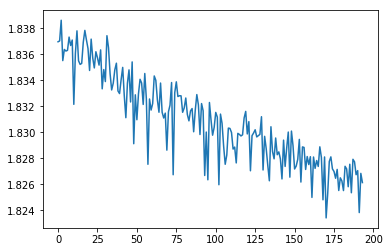

In [ ]:
plt.plot(learn.activation_stats.stats[1][-5].numpy());

In [ ]:
show_doc(Hook)

## <a id=Hook></a>`class` `Hook`
> `Hook`(`m`:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), `hook_func`:`HookFunc`, `is_forward`:`bool`=`True`)


Create a hook. <a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L10">[source]</a>

Registers and manually deregisters a [PyTorch hook](https://pytorch.org/tutorials/beginner/former_torchies/nn_tutorial.html#forward-and-backward-function-hooks). Your `hook_func` will be called automatically when forward/backward (depending on `is_forward`) for your module `m` is run, and the result of that function is placed in `self.stored`.

In [ ]:
show_doc(Hook.remove)

#### <a id=remove></a>`remove`
> `remove`()
<a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L23">[source]</a>

Deregister the hook, if not called already.

In [ ]:
show_doc(Hooks)

## <a id=Hooks></a>`class` `Hooks`
> `Hooks`(`ms`:`ModuleList`, `hook_func`:`HookFunc`, `is_forward`:`bool`=`True`)


Create several hooks. <a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L28">[source]</a>

Acts as a `Collection` (i.e. `len(hooks)` and `hooks[i]`) and an `Iterator` (i.e. `for hook in hooks`) of a group of hooks, one for each module in `ms`, with the ability to remove all as a group. Use `stored` to get all hook results. `hook_func` and `is_forward` behavior is the same as [`Hook`](/callbacks.hooks.html#Hook). See the source code for [`HookCallback`](/callbacks.hooks.html#HookCallback) for a simple example.

In [ ]:
show_doc(Hooks.remove)

#### <a id=remove></a>`remove`
> `remove`()
<a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L39">[source]</a>

Deregister all hooks created by this class, if not previously called.

## Convenience functions for hooks

In [ ]:
show_doc(hook_output)

#### <a id=hook_output></a>`hook_output`
> `hook_output`(`module`:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module)) -> [`Hook`](/callbacks.hooks.html#Hook)
<a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L42">[source]</a>

Function that creates a [`Hook`](/callbacks.hooks.html#Hook) for `module` that simply stores the output of the layer.

In [ ]:
show_doc(hook_outputs)

#### <a id=hook_outputs></a>`hook_outputs`
> `hook_outputs`(`modules`:`ModuleList`) -> [`Hooks`](/callbacks.hooks.html#Hooks)
<a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L43">[source]</a>

Function that creates a [`Hook`](/callbacks.hooks.html#Hook) for all passed `modules` that simply stores the output of the layers. For example, the (slightly simplified) source code of [`model_sizes`](/callbacks.hooks.html#model_sizes) is:

```python
def model_sizes(m, size):
    x = m(torch.zeros(1, in_channels(m), *size))
    return [o.stored.shape for o in hook_outputs(m)]
```

In [ ]:
show_doc(model_sizes)

#### <a id=model_sizes></a>`model_sizes`
> `model_sizes`(`m`:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), `size`:`tuple`=`(256, 256)`, `full`:`bool`=`True`) -> `Tuple`\[`Sizes`, `Tensor`, [`Hooks`](/callbacks.hooks.html#Hooks)\]


Pass a dummy input through the model to get the various sizes. <a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L74">[source]</a>

It can be useful to get the size of each layer of a model (e.g. for printing a summary, or for generating cross-connections for a `DynamicUnet`), however they depend on the size of the input. This function calculates the layer sizes by passing in a minimal tensor of `size`.

In [ ]:
show_doc(HookCallback)

## <a id=HookCallback></a>`class` `HookCallback`
> `HookCallback`(`learn`:[`Learner`](/basic_train.html#Learner), `modules`:`Sequence`\[[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module)\]=`None`, `do_remove`:`bool`=`True`) :: [`LearnerCallback`](/basic_train.html#LearnerCallback)


Callback that registers given hooks. <a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L45">[source]</a>

For all `modules`, uses a callback to automatically register a method `self.hook` (that you must define in an inherited class) as a hook. This method must have the signature:

```python
def hook(self, m:Model, input:Tensors, output:Tensors)
```

If `do_remove` then the hook is automatically deregistered at the end of training. See [`ActivationStats`](/callbacks.hooks.html#ActivationStats) for a simple example of inheriting from this class.

## Undocumented Methods - Methods moved below this line will intentionally be hidden

In [ ]:
show_doc(HookCallback.remove)

#### <a id=remove></a>`remove`
> `remove`()
<a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L60">[source]</a>

In [ ]:
show_doc(HookCallback.on_train_begin)

#### <a id=on_train_begin></a>`on_train_begin`
> `on_train_begin`(`kwargs`)


To initialize constants in the callback. <a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L51">[source]</a>

In [ ]:
show_doc(HookCallback.on_train_end)

#### <a id=on_train_end></a>`on_train_end`
> `on_train_end`(`kwargs`)


Useful for cleaning up things and saving files/models. <a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L57">[source]</a>

In [ ]:
show_doc(ActivationStats.hook)

#### <a id=hook></a>`hook`
> `hook`(`m`:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), `i`:`Tensors`, `o`:`Tensors`) -> `Tuple`\[`Rank0Tensor`, `Rank0Tensor`\]
<a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L69">[source]</a>

In [ ]:
show_doc(ActivationStats.on_batch_end)

#### <a id=on_batch_end></a>`on_batch_end`
> `on_batch_end`(`kwargs`)


Called at the end of the batch. <a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L71">[source]</a>

In [ ]:
show_doc(ActivationStats.on_train_begin)

#### <a id=on_train_begin></a>`on_train_begin`
> `on_train_begin`(`kwargs`)


To initialize constants in the callback. <a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L65">[source]</a>

In [ ]:
show_doc(ActivationStats.on_train_end)

#### <a id=on_train_end></a>`on_train_end`
> `on_train_end`(`kwargs`)


Useful for cleaning up things and saving files/models. <a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L72">[source]</a>